In [1]:
# Importing all necessary libraries required.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Taking data from database and Converting this data to DataFrame

whr = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
whr

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
# Sorting required columns and seperating it to another data
whr_columns = ['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
               'Family', 'Health (Life Expectancy)','Freedom', 
               'Trust (Government Corruption)',
               'Generosity']

In [4]:
whr = whr [whr_columns].copy()

In [5]:
# Renamed required columns

whr_data = whr.rename ({'Country': 'Country', 'Region':'Region', 'Happiness Score':'Happiness Score',
                        'Economy (GDP per Capita)': 'GDP', 'Family':'Family', 'Health (Life Expectancy)': 'Life Expectancy',
                       'Freedom': 'Freedom', 'Trust (Government Corruption)': 'Corruption',
                       'Generosity':'Generosity'}, axis = 1)

In [6]:
# checking if cloumns names are amended and checking (head and tail sample data)

whr_data.head()

,Country,Region,Happiness Score,GDP,Family,Life Expectancy,Freedom,Corruption,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [7]:
whr_data.tail()

,Country,Region,Happiness Score,GDP,Family,Life Expectancy,Freedom,Corruption,Generosity
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727
157,Togo,Sub-Saharan Africa,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


In [8]:
# checking if our data has null/missing values.

whr_data.isnull().sum()

Country            0
Region             0
Happiness Score    0
GDP                0
Family             0
Life Expectancy    0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

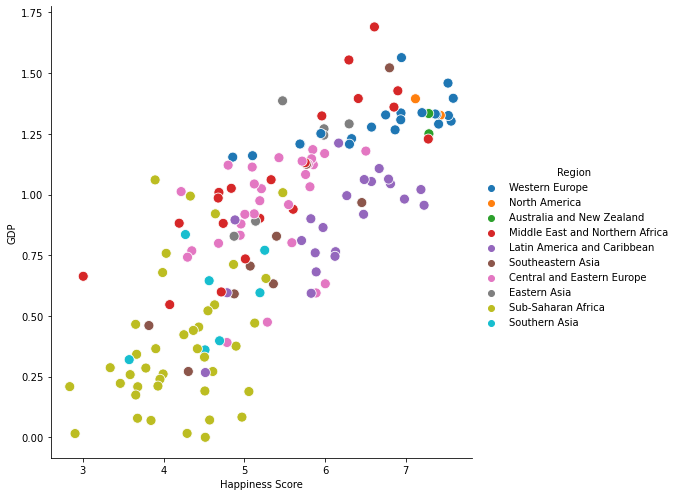

In [9]:
# Comparison between happiness and gdp

sns.relplot( x = 'Happiness Score' , y = 'GDP', data = whr_data , hue = 'Region', s = 100, height = 7)
plt.show ()

<AxesSubplot:>

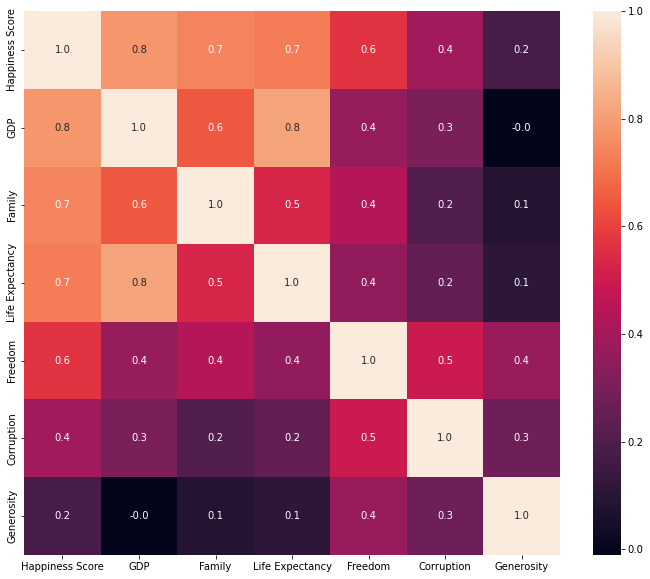

In [10]:
# Creating a heatmap to check correlation between all columns

correlation = whr_data.corr()

plt.figure (figsize = (12,10))
sns.heatmap(correlation, fmt = '.1f', annot = True)

In [11]:
# checking corruption in different regions

corruption = whr_data.groupby ('Region')[['Corruption']].mean()
corruption 


,Corruption
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


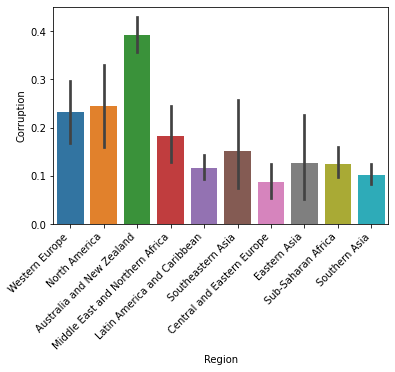

In [12]:
# Checking data of corrution data in various regions

sns.barplot (y = 'Corruption' , x = 'Region' , data = whr_data)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

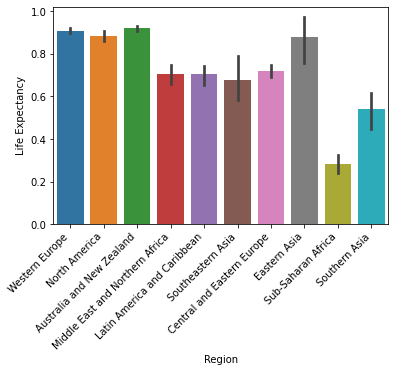

In [13]:
# checking life expectancy in various region
sns.barplot (x = 'Region' , y = 'Life Expectancy' , data = whr_data)
plt.xticks(rotation = 45, ha = 'right')
plt.show()


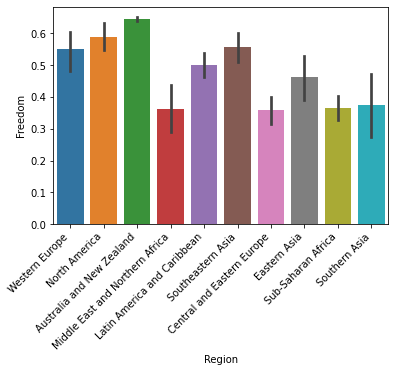

In [14]:
# checking Freedom in various region
sns.barplot (x = 'Region' , y = 'Freedom' , data = whr_data)
plt.xticks(rotation = 45, ha = 'right')
plt.show()